In [ ]:
# 对图片进行人脸关键点检测
import cv2
import dlib

# 加载人脸检测器和关键点检测器
face_detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# 读取图像
image_path = '../data/processed/1/1_0.png'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 人脸检测
faces = face_detector(gray)

# 遍历检测到的人脸
for face in faces:
    # 获取关键点
    landmarks = landmark_predictor(gray, face)
    
    # 在图像上绘制关键点
    for i in range(68):
        x, y = landmarks.part(i).x, landmarks.part(i).y
        cv2.circle(image, (x, y), 1, (0, 0, 255), 2)

# 显示结果
cv2.imshow('Facial Landmarks Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Processed frame 1
Processed frame 2
Processed frame 3
Processed frame 4
Processed frame 5
Processed frame 6
Processed frame 7
Processed frame 8
Processed frame 9
Processed frame 10
Processed frame 11
Processed frame 12
Processed frame 13
Processed frame 14
Processed frame 15
Processed frame 16
Processed frame 17
Processed frame 18
Processed frame 19
Processed frame 20
Processed frame 21
Processed frame 22
Processed frame 23
Processed frame 24
Processed frame 25
Processed frame 26
Processed frame 27
Processed frame 28
Processed frame 29
Processed frame 30
Processed frame 31
Processed frame 32
Processed frame 33
Processed frame 34
Processed frame 35
Processed frame 36
Processed frame 37
Processed frame 38
Processed frame 39
Processed frame 40
Processed frame 41
Processed frame 42
Processed frame 43
Processed frame 44
Processed frame 45
Processed frame 46
Processed frame 47
Processed frame 48
Processed frame 49
Processed frame 50
Processed frame 51
Processed frame 52
Processed frame 53
Pr

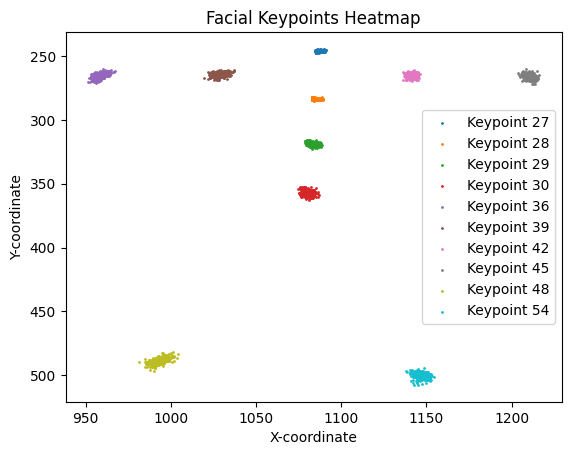

In [8]:
#对视频进行人脸关键点检测
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt

# 加载人脸检测器和关键点检测器
face_detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# 打开视频文件（或者替换成摄像头捕捉）
video_path = '../data/processed/L2/3-smile.mp4'
cap = cv2.VideoCapture(video_path)

# 设置帧率为每秒60帧
fps = 60
cap.set(cv2.CAP_PROP_FPS, fps)

# 定义要记录的关键点索引
keypoints_to_record = [27, 28, 29, 30, 36, 39, 42, 45, 48, 54]

# 初始化用于记录关键点位置范围的列表
keypoints_positions = {i: [] for i in keypoints_to_record}

j = 0

# 记录中心点位置
center_x = 0
center_y = 0
diff_x = 0
diff_y = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # 将图像转为灰度
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 人脸检测
    faces = face_detector(gray)

    # 遍历检测到的人脸
    for face in faces:
        # 获取关键点
        landmarks = landmark_predictor(gray, face)

        # 在图像上绘制关键点
        for i in keypoints_to_record:
            x, y = landmarks.part(i).x, landmarks.part(i).y
            cv2.circle(frame, (x, y), 1, (0, 0, 255), 5)
        
        # 记录中心点位置
        center_x_tmp = int((landmarks.part(27).x + landmarks.part(28).x) / 2)
        center_y_tmp = int((landmarks.part(27).y + landmarks.part(28).y) / 2)
        if center_x != 0:
            diff_x = center_x - center_x_tmp
            diff_y = center_y - center_y_tmp
        center_x = (center_x_tmp + j * center_x) / (j + 1)
        center_y = (center_y_tmp + j * center_y) / (j + 1)

        # 记录特殊点位置
        for i in keypoints_to_record:
            x, y = landmarks.part(i).x, landmarks.part(i).y
            x, y = landmarks.part(i).x + diff_x, landmarks.part(i).y + diff_y
            keypoints_positions[i].append((x, y))

    # 显示结果
    cv2.imshow('Facial Landmarks Detection', frame)

    # 计算帧数
    j += 1
    print(f'Processed frame {j}')

    # 按下'q'键退出
    if cv2.waitKey(1000 // fps) & 0xFF == ord('q'):
        break


# 释放资源
cap.release()
cv2.destroyAllWindows()

# 绘制热图
for keypoint, positions in keypoints_positions.items():
    x, y = zip(*positions)
    plt.scatter(x, y, s=1, label=f'Keypoint {keypoint}')

plt.title('Facial Keypoints Heatmap')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')

# 反转Y轴
plt.gca().invert_yaxis()

plt.legend()
plt.show()